# Projeto 1 - Ciência dos Dados

Nome: Amanda Ades

Turma: 2C

## Pergunta a ser respondida:

Nos paises que participam da OECD as mulheres tem mais autonomia e lugar no ambito economico e politico?

## Explicação da hipótese e mecanismo:

A OECD (Organisation for Economic Co-operation and Development), é uma organizacao focada no desenvolvimento economico  e bem estar social de um pais. Portanto, ela é também defensora dos direitos iguais entre homens e mulheres, desta forma, para esta pesquisa,  dados de escolaridade, economia e politica serão utlizadas para medir o núvel de igualdade entre homens e mulheres. Neste estudo, os dados entre paises que fazem parte da OECD  e que não fazem parte da OECD serão comparados.

Hipotese: Nos paises que fazem parte da OECD as mulheres terão mais visibilidade e com o passar dos anos ela aumentará


## Bases de dados usadas:

https://www.gapminder.org


## Análise de dados:

In [38]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np
import seaborn as sn

In [41]:
#Leitura das tres planilhas utilizadas:

#media de anos escolares de mulheres em relacao ao de homens
school = pd.read_excel('mean_school_years.xlsx')

#porcentagem de mulheres envolvidas na politica/parlamemto
parlament = pd.read_excel('parlament.xlsx')

#porcentagem de mulheres com trabalhos remunerados
employed_women = pd.read_excel('employed_women.xlsx')


FileNotFoundError: [Errno 2] No such file or directory: 'parlament.xlsx'

In [3]:
#Adicionando a coluna OECD em uma das planilhas e colocando todos os valores como não primeiramente
school.insert(0, "OECD", "não")
school.head(6)

,OECD,country,1970,1971,1972,1973,1974,1975,1976,1977,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,não,Afghanistan,15.4,15.8,15.4,15.6,15.9,16.1,16.4,16.6,...,21.5,21.9,22.2,22.3,22.6,22.9,23.1,23.4,23.5,23.7
1,não,Albania,87.4,87.9,88.3,88.9,89.2,89.7,90.2,90.6,...,100.0,101.0,101.0,101.0,101.0,102.0,102.0,102.0,102.0,103.0
2,não,Algeria,90.0,90.3,90.2,90.5,90.4,90.4,90.4,90.6,...,87.6,88.0,88.3,88.7,89.0,89.4,89.7,90.0,90.5,90.8
3,não,Andorra,97.0,97.4,97.8,98.1,98.4,98.8,99.1,99.5,...,105.0,105.0,105.0,105.0,105.0,105.0,106.0,106.0,106.0,106.0
4,não,Angola,51.3,51.4,51.9,52.3,52.8,53.2,53.4,53.8,...,68.5,68.9,69.5,70.1,70.5,71.2,71.7,72.2,72.9,73.3
5,não,Antigua and Barbuda,103.0,103.0,104.0,104.0,104.0,105.0,105.0,105.0,...,110.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0


In [4]:
#Adicionando sim nos paises que fazem parte da OECD
school.loc[(school.country=="Austria") | (school.country=="Belgium")|(school.country=="Canada")| (school.country=="Denmark")|(school.country=="France")|(school.country=="Greece")|(school.country=="Iceland")|(school.country=="Ireland")|(school.country=="Italy")|(school.country=="Luxembourg")|(school.country=="The Netherlands")|(school.country=="Norway")|(school.country=="Portugal")|(school.country=="Spain")|(school.country=="Sweden")|(school.country=="Switzerland")|(school.country=="Turkey")|(school.country=="United Kingdom")|(school.country=="United States")|(school.country=="Germany")|(school.country=="Australia")|(school.country=="Finland")|(school.country=="Japan")|(school.country=="New Zeeland")|(school.country=="Chile")|(school.country=="Czech Republic")|(school.country=="Estonia")|(school.country=="Hungary")|(school.country=="Mexico")|(school.country=="Poland")|(school.country=="Slovakia")|(school.country=="South Korea"),['OECD']]='sim'
school.head(2)

,OECD,country,1970,1971,1972,1973,1974,1975,1976,1977,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,não,Afghanistan,15.4,15.8,15.4,15.6,15.9,16.1,16.4,16.6,...,21.5,21.9,22.2,22.3,22.6,22.9,23.1,23.4,23.5,23.7
1,não,Albania,87.4,87.9,88.3,88.9,89.2,89.7,90.2,90.6,...,100.0,101.0,101.0,101.0,101.0,102.0,102.0,102.0,102.0,103.0


In [5]:
#Novo dataframe que guarda somenete as informacões de 2005 até 2010
school_2005_2010=school.loc[:,['OECD','country',2005,2006,2007,2008,2009,2010]]
parlament_2005_2010=parlament.loc[:,['country',2005,2006,2007,2008,2009,2010]]
employed_women_2005_2010=employed_women.loc[:,['country',2005,2006,2007,2008,2009,2010]]

In [6]:
#Salvando a coluna de paises como um index

S = school_2005_2010.set_index('country')
P = parlament_2005_2010.set_index('country')
E = employed_women_2005_2010.set_index('country')

In [7]:
#Juntando as tres tabelas e colocando um sufixo representando a variavel em cada ano

data=S.join(P, how='inner', lsuffix='_S', rsuffix='_P')
new = data.join(E, how='inner', rsuffix='_E')

In [8]:
#Renomeando as colunas referentes a employement (colocando o sufixo de E)

new.rename(columns={2005: "2005_E", 2006:"2006_E", 2007:"2007_E",2008:"2008_E",2009:"2009_E",2010: "2010_E"}, inplace=True) 

In [9]:
#Criando um novo dataframe somente com os paises que não fazem parte da OECD

naoOECD=new[new.OECD == 'não']
simOECD=new[new.OECD=='sim']


In [10]:
new.describe()

,2005_S,2006_S,2007_S,2008_S,2009_S,2010_S,2005_P,2006_P,2007_P,2008_P,2009_P,2010_P,2005_E,2006_E,2007_E,2008_E,2009_E,2010_E
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,158.000000,162.000000,162.000000,160.000000,159.000000,159.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,89.276471,89.594118,89.870588,90.171765,90.498235,90.817059,16.437342,16.585185,17.679012,17.901250,18.771069,18.742138,53.697429,54.005092,54.336969,54.580669,54.585466,54.722877
std,21.187948,21.071430,20.930886,20.802242,20.697121,20.595409,9.801751,9.978687,9.935246,10.400242,10.789530,10.691250,32.636941,32.563472,32.585191,32.671080,32.588762,32.488690
min,21.400000,21.500000,21.900000,22.200000,22.300000,22.600000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.924000,0.930000,0.936000,0.945000,0.954000,0.978000
25%,75.250000,76.000000,76.650000,77.400000,77.975000,78.600000,9.125000,8.725000,10.275000,10.000000,10.000000,10.350000,21.983500,22.867000,22.069000,21.783000,21.915500,21.837999
50%,99.800000,100.000000,100.000000,100.500000,101.000000,101.000000,14.250000,14.400000,16.400000,16.100000,17.800000,17.300000,58.261002,55.904999,56.681000,57.488998,58.210999,59.660999
75%,104.000000,104.000000,104.000000,104.000000,104.000000,105.000000,21.775000,22.075000,23.375000,23.750000,24.850000,24.300000,85.606998,86.134499,86.725502,86.954502,87.279999,87.429001
max,126.000000,126.000000,127.000000,126.000000,126.000000,126.000000,48.800000,48.800000,48.800000,56.300000,56.300000,56.300000,99.847000,99.682999,99.683998,99.617996,99.529999,99.445000


In [11]:
# Cria dataframe com apenas com os dados de school
newschool = new.loc[:, (new.columns == 'OECD') | (new.columns.str.endswith("_S"))]
# Remove o _S do final do nome das colunas do novo dataframe
newschool.columns = newschool.columns.str.rstrip('_S')

# Cria dataframe com apenas com os dados de parlament
newparlament = new.loc[:, (new.columns == 'OECD') | (new.columns.str.endswith("_P"))]
# Remove o _P do final do nome das colunas do novo dataframe
newparlament.columns = newparlament.columns.str.rstrip('_P')


# Cria dataframe com apenas com os dados de employement
newemployement = new.loc[:, (new.columns == 'OECD') | (new.columns.str.endswith("_E"))]
# Remove o _E do final do nome das colunas do novo dataframe
newemployement.columns = newemployement.columns.str.rstrip('_E')

In [42]:
# Calcula a media e faz a transposta
meanschool = newschool.groupby('OECD').mean().T
meanparlament = newparlament.groupby('OECD').mean().T
meanemployement = newemployement.groupby('OECD').mean().T

OECD,não,sim
2005,86.841549,101.625000
2006,87.154930,101.964286
2007,87.454930,102.121429
2008,87.804225,102.178571
2009,88.157746,102.367857
2010,88.496479,102.585714
var,1.023011,1.009691


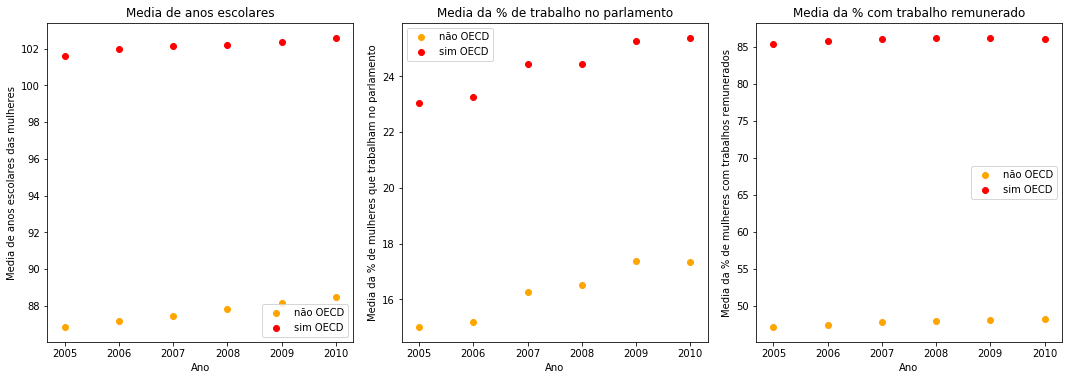

In [13]:
x=[2005,2006,2007,2008,2009,2010]

fig = plt.figure(figsize=(15, 15))
plt.subplot(331)
plt.scatter(x,meanschool['não'],label='não OECD', color='orange')
plt.scatter(x,meanschool['sim'],label='sim OECD', color='red')
plt.title('Media de anos escolares')
plt.ylabel('Media de anos escolares das mulheres')
plt.xlabel('Ano')
plt.legend()

plt.subplot(332)
plt.scatter(x,meanparlament['não'],label='não OECD', color='orange')
plt.scatter(x,meanparlament['sim'],label='sim OECD', color='red')
plt.title('Media da % de trabalho no parlamento')
plt.ylabel('Media da % de mulheres que trabalham no parlamento')
plt.xlabel('Ano')
plt.legend()

plt.subplot(333)
plt.scatter(x,meanemployement['não'],label='não OECD', color='orange')
plt.scatter(x,meanemployement['sim'],label='sim OECD', color='red')
plt.title('Media da % com trabalho remunerado')
plt.ylabel('Media da % de mulheres com trabalhos remunerados')
plt.xlabel('Ano')
plt.legend()

plt.tight_layout()
plt.show()

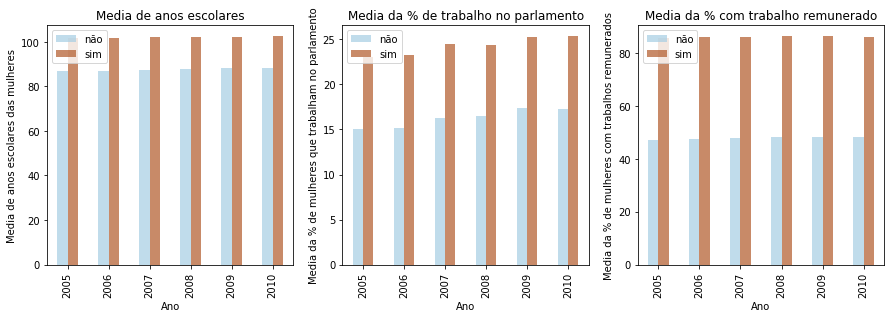

In [14]:
#Graficos  comparativos da media
fig = plt.figure(figsize=(15, 15))
ax1=fig.add_subplot(3,3,1)
meanschool.plot.bar(colormap='Paired', alpha = 0.7, ax=ax1)
plt.title('Media de anos escolares')
plt.ylabel('Media de anos escolares das mulheres')
plt.xlabel('Ano')
plt.legend()

ax2=fig.add_subplot(3,3,2)
meanparlament.plot.bar(colormap='Paired', alpha = 0.7,ax=ax2)
plt.title('Media da % de trabalho no parlamento')
plt.ylabel('Media da % de mulheres que trabalham no parlamento')
plt.xlabel('Ano')
plt.legend()

ax3=fig.add_subplot(3,3,3)
meanemployement.plot.bar(colormap='Paired', alpha = 0.7, ax=ax3)
plt.title('Media da % com trabalho remunerado')
plt.ylabel('Media da % de mulheres com trabalhos remunerados')
plt.xlabel('Ano')
plt.legend()
plt.show()

In [15]:
# Calcula a mediana e faz a transposta
medianschool = newschool.groupby('OECD').median().T
medianparlament = newparlament.groupby('OECD').median().T
medianemployement = newemployement.groupby('OECD').median().T

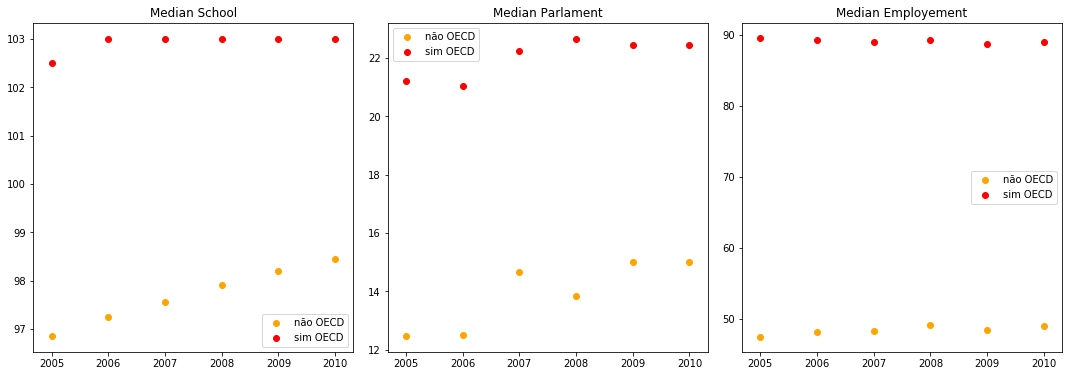

In [16]:
x=[2005,2006,2007,2008,2009,2010]

fig = plt.figure(figsize=(15, 15))
plt.subplot(331)
plt.scatter(x,medianschool['não'],label='não OECD', color='orange')
plt.scatter(x,medianschool['sim'],label='sim OECD', color='red')
plt.title('Median School')
plt.legend()

plt.subplot(332)
plt.scatter(x,medianparlament['não'],label='não OECD', color='orange')
plt.scatter(x,medianparlament['sim'],label='sim OECD', color='red')
plt.title('Median Parlament')
plt.legend()

plt.subplot(333)
plt.scatter(x,medianemployement['não'],label='não OECD', color='orange')
plt.scatter(x,medianemployement['sim'],label='sim OECD', color='red')
plt.title('Median Employement')
plt.legend()
plt.tight_layout()
plt.show()

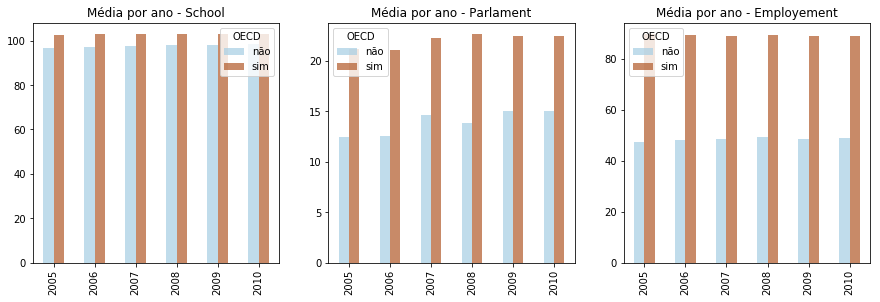

In [17]:
#Graficos  comparativos da mediana
fig = plt.figure(figsize=(15, 15))
ax1=fig.add_subplot(3,3,1)
medianschool.plot.bar(title = "Média por ano - School", colormap='Paired', alpha = 0.7, ax=ax1)
ax2=fig.add_subplot(3,3,2)

medianparlament.plot.bar(title = "Média por ano - Parlament", colormap='Paired', alpha = 0.7, ax=ax2)
ax3=fig.add_subplot(3,3,3)

medianemployement.plot.bar( title = "Média por ano - Employement", colormap='Paired', alpha = 0.7, ax=ax3)

In [18]:
#Comparando as medias
meandschool=meanschool['sim']-meanschool['não']
meandparlament=meanparlament['sim']-meanparlament['não']
meandemployement=meanemployement['sim']-meanemployement['não']


#Comparando as medianas
mediandschool=medianschool['sim']-medianschool['não']
mediandparlament=medianparlament['sim']-medianparlament['não']
mediandemployement=medianemployement['sim']-medianemployement['não']


In [19]:
print('diferencia da média da escola entre os paises OECD e não OECD:')
print(meandschool)
print('diferencia da média do parlamento entre os paises OECD e não OECD:')
print(meandparlament)
print('diferencia da média do employement entre os paises OECD e não OECD:')
print(meandemployement)
print('diferencia da mediana da escola entre os paises OECD e não OECD:')
print(mediandschool)
print('diferencia da mediana do parlemento entre os paises OECD e não OECD:')
print(mediandparlament)
print('diferencia da mediana do employement entre os paises OECD e não OECD:')
print(mediandemployement)

diferencia da média da escola entre os paises OECD e não OECD:
2005    14.783451
2006    14.809356
2007    14.666499
2008    14.374346
2009    14.210111
2010    14.089235
dtype: float64
diferencia da média do parlamento entre os paises OECD e não OECD:
2005    8.041264
2006    8.070416
2007    8.185821
2008    7.920563
2009    7.876745
2010    8.037568
dtype: float64
diferencia da média do employement entre os paises OECD e não OECD:
2005    38.260670
2006    38.405535
2007    38.238844
2008    38.243909
2009    38.105300
2010    37.896872
dtype: float64
diferencia da mediana da escola entre os paises OECD e não OECD:
2005    5.65
2006    5.75
2007    5.45
2008    5.10
2009    4.80
2010    4.55
dtype: float64
diferencia da mediana do parlemento entre os paises OECD e não OECD:
2005    8.75
2006    8.55
2007    7.60
2008    8.80
2009    7.45
2010    7.45
dtype: float64
diferencia da mediana do employement entre os paises OECD e não OECD:
2005    42.146503
2006    41.231998
2007    40.67

In [20]:
#Crescimento durante os 5 anos:
meanschool

OECD,não,sim
2005,86.841549,101.625000
2006,87.154930,101.964286
2007,87.454930,102.121429
2008,87.804225,102.178571
2009,88.157746,102.367857
2010,88.496479,102.585714


In [50]:
ms2005=meanschool.iloc[[0]]
ms2010=meanschool.iloc[[5]]
difs = (ms2010.values- mp2005.values)/ms2005*100
print(difs)
print()

mp2005=meanparlament.iloc[[0]]
mp2010=meanparlament.iloc[[5]]
difp = (mp2010.values- mp2005.values) /mp2005*100
print(difp)
print()

me2005=meanemployement.iloc[[0]]
me2010=meanemployement.iloc[[5]]
dife = (me2010.values- mp2005.values)/ me2005*100
print(dife)

OECD        não        sim
2005  84.618678  78.260411

OECD        não        sim
2005  15.416749  10.023238

OECD        não        sim
2005  70.452299  73.848753


In [23]:

newschool['var']=newschool['2010']/newschool['2005']
newparlament['var']=newparlament['2010']/newparlament['2005']
newemployement['var']=newemployement['2010']/newemployement['2005']

newschoolnão=newschool[newschool.OECD == 'não']
newschoolsim=newschool[newschool.OECD == 'sim']

newparlamentnão=newparlament[newparlament.OECD == 'não']
newparlamentsim=newparlament[newparlament.OECD == 'sim']

newemployementnão=newemployement[newemployement.OECD == 'não']
newemployementsim=newemployement[newemployement.OECD == 'sim']


C:\Users\Amanda Ades\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Amanda Ades\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Amanda Ades\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

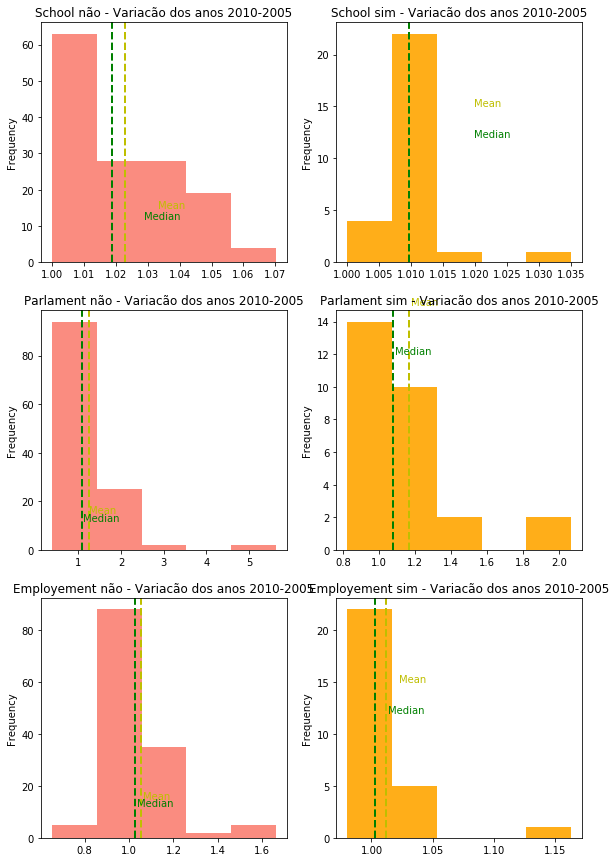

In [24]:
def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color) 

fig = plt.figure(figsize=(15, 15))
plt.subplot(331)
plot = newschoolnão['var'].plot.hist(bins=5, title='School não - Variacão dos anos 2010-2005', alpha=0.9,color='salmon')
verticalLine(plot, newschoolnão['var'].mean(), 15, "y", "Mean")
verticalLine(plot, newschoolnão['var'].median(), 12, "g", "Median")
plt.subplot(332)
plot = newschoolsim['var'].plot.hist(bins=5, title='School sim - Variacão dos anos 2010-2005', alpha=0.9, color='orange')
verticalLine(plot, newschoolsim['var'].mean(), 15, "y", "Mean")
verticalLine(plot, newschoolsim['var'].median(), 12, "g", "Median")


plt.subplot(334)
plot = newparlamentnão['var'].plot.hist(bins=5, title='Parlament não - Variacão dos anos 2010-2005', alpha=0.9, color='salmon')
verticalLine(plot, newparlamentnão['var'].mean(), 15, "y", "Mean")
verticalLine(plot, newparlamentnão['var'].median(), 12, "g", "Median")
plt.subplot(335)
plot = newparlamentsim['var'].plot.hist(bins=5, title='Parlament sim - Variacão dos anos 2010-2005', alpha=0.9,color='orange')
verticalLine(plot, newparlamentsim['var'].mean(), 15, "y", "Mean")
verticalLine(plot, newparlamentsim['var'].median(), 12, "g", "Median")


plt.subplot(337)
plot = newemployementnão['var'].plot.hist(bins=5, title='Employement não - Variacão dos anos 2010-2005', alpha=0.9, color='salmon')
verticalLine(plot, newemployementnão['var'].mean(), 15, "y", "Mean")
verticalLine(plot, newemployementnão['var'].median(), 12, "g", "Median")
plt.subplot(338)
plot = newemployementsim['var'].plot.hist(bins=5, title='Employement sim - Variacão dos anos 2010-2005', alpha=0.9, color='orange')
verticalLine(plot, newemployementsim['var'].mean(), 15, "y", "Mean")
verticalLine(plot, newemployementsim['var'].median(), 12, "g", "Median")
plt.show()

In [25]:
ms2005=medianschool.iloc[[0]]
ms2010=medianschool.iloc[[5]]
difs = (ms2010-ms2005.values)/ (ms2005.values)*100

print(difs)
print()

mp2005=medianparlament.iloc[[0]]
mp2010=medianparlament.iloc[[5]]
difp = (mp2010-mp2005.values)/ (mp2005.values)*100
print(difp)
print()

me2005=medianemployement.iloc[[0]]
me2010=meanemployement.iloc[[5]]
dife = (me2010-me2005.values)/ (me2005.values)*100
print(dife)

OECD       não       sim
2010  1.652039  0.487805

OECD        não       sim
2010  20.481928  5.896226

OECD       não       sim
2010  1.603695 -3.893644


<Figure size 1080x1080 with 0 Axes>

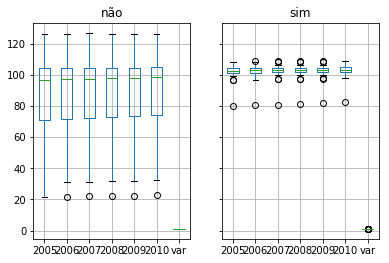

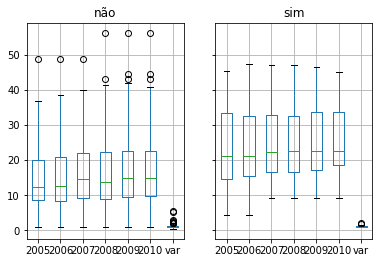

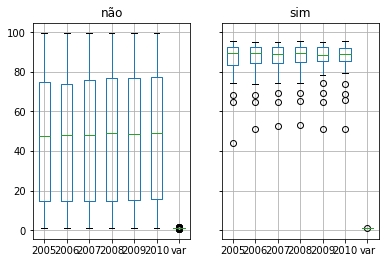

In [52]:
fig = plt.figure(figsize=(15, 15))

newschool.groupby('OECD').boxplot()
plt.show()
newparlament.groupby('OECD').boxplot()
plt.show()
newemployement.groupby('OECD').boxplot()
plt.show()

In [27]:
newschool.head()

,OECD,2005,2006,2007,2008,2009,2010,var
country,,,,,,,,
Afghanistan,não,21.4,21.5,21.9,22.2,22.3,22.6,1.056075
Albania,não,100.0,100.0,101.0,101.0,101.0,101.0,1.010000
Algeria,não,87.2,87.6,88.0,88.3,88.7,89.0,1.020642
Andorra,não,105.0,105.0,105.0,105.0,105.0,105.0,1.000000
Angola,não,67.8,68.5,68.9,69.5,70.1,70.5,1.039823


In [28]:
x=pd.pivot_table(data=newschool,index='OECD', aggfunc=np.std)
x

,2005,2006,2007,2008,2009,2010,var
OECD,,,,,,,
não,22.292346,22.156697,22.017239,21.908734,21.810409,21.708205,0.016824
sim,5.047010,5.047274,4.933961,4.793696,4.710513,4.700096,0.006432


In [29]:
x=pd.pivot_table(data=newparlament,index='OECD', aggfunc=np.std)
x

,2005,2006,2007,2008,2009,2010,var
OECD,,,,,,,
não,9.010709,9.288758,9.289022,9.958567,10.354165,10.236525,0.677043
sim,10.749866,10.624198,10.299604,10.105708,10.584732,10.447903,0.273585


In [30]:
x=pd.pivot_table(data=newemployement,index='OECD', aggfunc=np.std)
x

,2005,2006,2007,2008,2009,2010,var
OECD,,,,,,,
não,31.740372,31.688157,31.770619,31.882101,31.799637,31.722009,0.142335
sim,11.565348,10.578938,10.266719,10.172712,10.315226,10.266824,0.034051
